In [1]:
from utils import *
from data_module import *
from resnet_custom import *
import albumentations as A
from pytorch_lightning import LightningModule, Trainer
import torchmetrics
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics.classification import Accuracy
from pytorch_lightning import loggers as pl_loggers

In [2]:
train_set_transforms

{'randomcrop': RandomCrop(always_apply=False, p=0.2, height=32, width=32),
 'horizontalflip': HorizontalFlip(always_apply=False, p=0.5),
 'cutout': CoarseDropout(always_apply=False, p=0.5, max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=1, min_width=1, fill_value=[125.3069184, 122.95035885, 113.8654662], mask_fill_value=None),
 'normalize': Normalize(always_apply=False, p=1.0, mean=(0.49139968, 0.48215827, 0.44653124), std=(0.24703233, 0.24348505, 0.26158768), max_pixel_value=255.0),
 'standardize': ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)}

In [3]:
test_set_transforms

{'normalize': Normalize(always_apply=False, p=1.0, mean=(0.49139968, 0.48215827, 0.44653124), std=(0.24703233, 0.24348505, 0.26158768), max_pixel_value=255.0),
 'standardize': ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)}

In [4]:
train_transforms = A.Compose(train_set_transforms.values())
test_transforms = A.Compose(test_set_transforms.values())

In [5]:
train_set = AlbumDataset('./data',
                         train=True,
                         download=True,
                         transform=train_transforms)

test_set = AlbumDataset('./data',
                        train=False,
                        download=False,
                        transform=test_transforms)

Files already downloaded and verified


In [6]:
# Hyperparameters

SEED = 8
BATCH_SIZE = 512

cuda = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)



In [7]:
# dataloader arguments
train_dataloader_args = dict(shuffle=True,
                             batch_size = BATCH_SIZE,
                             num_workers = 0,
                             pin_memory = True) if cuda else dict(shuffle=True, batch_size = 64)

test_dataloader_args = dict(shuffle=False,
                            batch_size = BATCH_SIZE,
                            num_workers = 0,
                            pin_memory = True) if cuda else dict(shuffle=True, batch_size = 64)

In [8]:
train_loader = torch.utils.data.DataLoader(train_set, **train_dataloader_args)
test_loader = torch.utils.data.DataLoader(test_set, **test_dataloader_args)

In [9]:
model = CustomResnet2()
type(model), isinstance(model, LightningModule)

(resnet_custom.CustomResnet2, True)

In [10]:
# TensorBoard Logger
tb_logger = pl_loggers.TensorBoardLogger('logs/')

In [11]:
trainer = Trainer(max_epochs = 30,
                  log_every_n_steps= 10,
                  logger = tb_logger)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [12]:
trainer.fit(model, train_loader, test_loader)

You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Missing logger folder: logs/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name       | Type               | Params
---------------------------------------------------
0  | prep_layer | Sequential         | 1.9 K 
1  | layer1     | Sequential         | 74.0 K
2  | res_block1 | ResidualBlock      | 295 K 
3  | layer2     | Sequential         | 295 K 
4  | layer3     | Sequential         | 1.2 M 
5  | res_block2 | ResidualBlock      | 4.7 M 
6  | maxpool    | MaxPool2d          | 0     
7  | fc         | Linear             | 5.1 K 
8  | softmax    | Softmax            | 0     
9  | loss_obj   | CrossEntropyLoss   |

Sanity Checking: 0it [00:00, ?it/s]

c:\Users\rohit\anaconda3\envs\tf\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\rohit\anaconda3\envs\tf\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


In [14]:
trainer.logged_metrics

{'train_loss': tensor(1.5251),
 'train_acc': tensor(0.9405),
 'valid_loss': tensor(1.5791),
 'valid_acc': tensor(0.8870),
 'epoch_valid_accuracy': tensor(0.7937),
 'epoch_train_accuracy': tensor(0.8494)}

In [13]:
%load_ext tensorboard
%tensorboard --logdir logs

Launching TensorBoard...

In [15]:
# save the model checkpoint
trainer.save_checkpoint("cifar10_resnet_epochs30.ckpt")


In [16]:
classes = train_set.classes
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [17]:
inv_normalize

Normalize(mean=[-2.1739130434782608, -2.1739130434782608, -2.1739130434782608], std=[4.3478260869565215, 4.3478260869565215, 4.3478260869565215])

In [18]:
model.to(device)
misclassified_data = get_misclassified_data(model,
                                            device,
                                            test_loader)

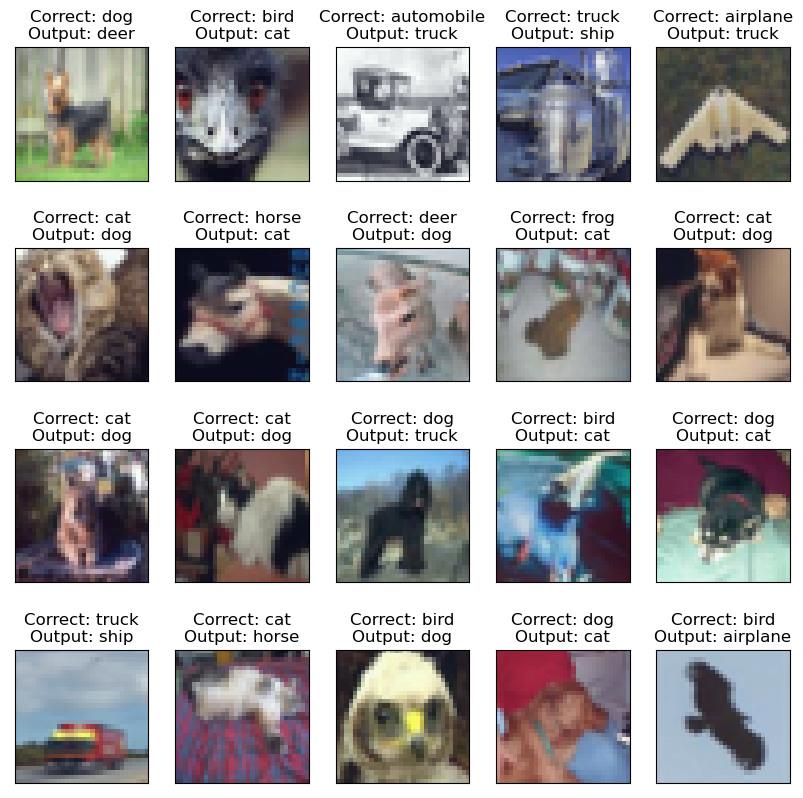

In [19]:
display_cifar_misclassified_data(misclassified_data,
                                 classes,
                                 inv_normalize,
                                 number_of_samples=20)

In [20]:
display_gradcam_output

<function utils.display_gradcam_output(data: list, classes: list[str], inv_normalize: torchvision.transforms.transforms.Normalize, model, target_layers: list, targets=None, number_of_samples: int = 10, transparency: float = 0.6)>

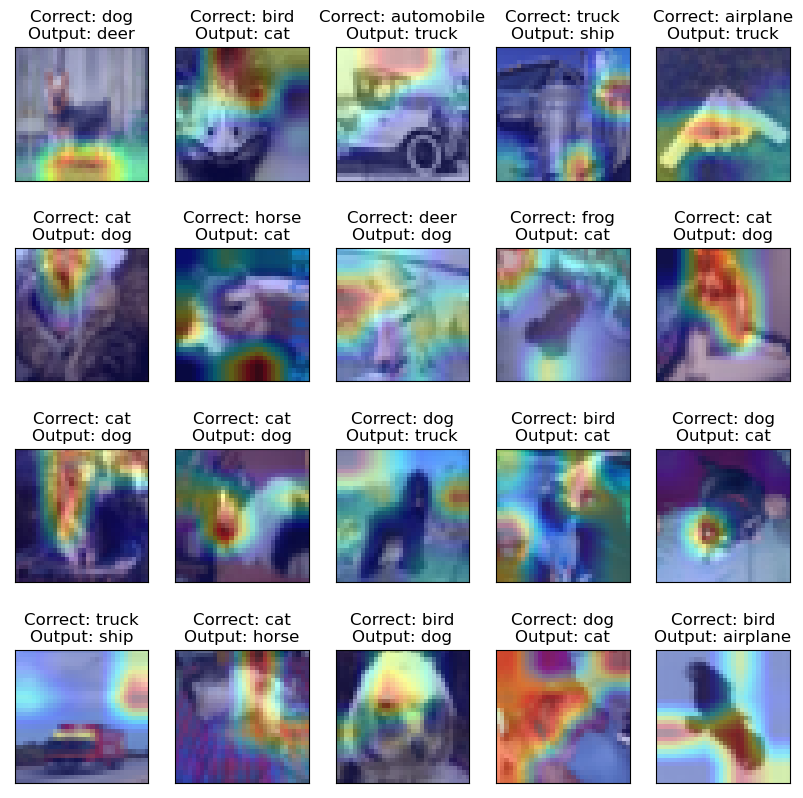

In [21]:
target_layers = [model.layer3[-1]]
targets = None

display_gradcam_output(misclassified_data, classes, inv_normalize, model, target_layers, targets, number_of_samples=20, transparency=0.70)

In [4]:
# helper_fn.py

import torch
from pytorch_lightning import LightningModule
import gradio as gr
from PIL import Image
from resnet_custom import *
from torchvision import transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

img_test_transforms = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225] )
    ])

inv_normalize = transforms.Normalize(
    mean=[-0.50/0.23, -0.50/0.23, -0.50/0.23],
    std=[1/0.23, 1/0.23, 1/0.23]
)


classes = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

target_layers = [model.layer3[-1]]
targets = None



def get_model(ckpt_file):
    model = CustomResnet2.load_from_checkpoint(ckpt_file)
    return model

model = get_model("cifar10_resnet_epochs30.ckpt")


In [ ]:
def